# Step 1: Import Libraries and Load Data

In [71]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import seaborn as sn

## Load the Dataset

In [72]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = (
    "apple",
    "aquarium_fish",
    "baby",
    "bear",
    "beaver",
    "bed",
    "bee",
    "beetle",
    "bicycle",
    "bottle",
    "bowl",
    "boy",
    "bridge",
    "bus",
    "butterfly",
    "camel",
    "can",
    "castle",
    "caterpillar",
    "cattle",
    "chair",
    "chimpanzee",
    "clock",
    "cloud",
    "cockroach",
    "couch",
    "crab",
    "crocodile",
    "cup",
    "dinosaur",
    "dolphin",
    "elephant",
    "flatfish",
    "forest",
    "fox",
    "girl",
    "hamster",
    "house",
    "kangaroo",
    "keyboard",
    "lamp",
    "lawn_mower",
    "leopard",
    "lion",
    "lizard",
    "lobster",
    "man",
    "maple_tree",
    "motorcycle",
    "mountain",
    "mouse",
    "mushroom",
    "oak_tree",
    "orange",
    "orchid",
    "otter",
    "palm_tree",
    "pear",
    "pickup_truck",
    "pine_tree",
    "plain",
    "plate",
    "poppy",
    "porcupine",
    "possum",
    "rabbit",
    "raccoon",
    "ray",
    "road",
    "rocket",
    "rose",
    "sea",
    "seal",
    "shark",
    "shrew",
    "skunk",
    "skyscraper",
    "snail",
    "snake",
    "spider",
    "squirrel",
    "streetcar",
    "sunflower",
    "sweet_pepper",
    "table",
    "tank",
    "telephone",
    "television",
    "tiger",
    "tractor",
    "train",
    "trout",
    "tulip",
    "turtle",
    "wardrobe",
    "whale",
    "willow_tree",
    "wolf",
    "woman",
    "worm"
)

Files already downloaded and verified
Files already downloaded and verified


## Visualise the data

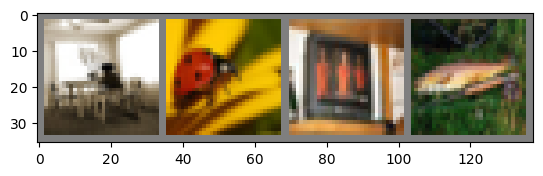

table beetle television trout


In [73]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Build a Deep Convolutional Neural Network

Define CNN model
- first conv layer
 - in_channels (3)
 - out_channels (6)
 - kernel_size (5)
- second conv layer
 - in_channels (6)
 - out_channels (16)
 - kernel_size (5)
- one pool layer
- three fully connected layer

In [74]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, stride=1, padding=0, dilation=1, groups=1, 
                               bias=True, padding_mode='zeros', device=None, dtype=None)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5, stride=1, padding=0, dilation=1, groups=1, 
                               bias=True, padding_mode='zeros', device=None, dtype=None)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 100)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = CNN()

Define
- loss function
- optimizer
- learning rate (lr)
- momentum

- epoch to train

In [75]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the Network

In [76]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 4.605
[1,  4000] loss: 4.539
[1,  6000] loss: 4.345
[1,  8000] loss: 4.124
[1, 10000] loss: 4.006
[1, 12000] loss: 3.880
[2,  2000] loss: 3.783
[2,  4000] loss: 3.716
[2,  6000] loss: 3.660
[2,  8000] loss: 3.596
[2, 10000] loss: 3.571
[2, 12000] loss: 3.511
[3,  2000] loss: 3.436
[3,  4000] loss: 3.433
[3,  6000] loss: 3.367
[3,  8000] loss: 3.365
[3, 10000] loss: 3.317
[3, 12000] loss: 3.310
[4,  2000] loss: 3.205
[4,  4000] loss: 3.193
[4,  6000] loss: 3.206
[4,  8000] loss: 3.196
[4, 10000] loss: 3.173
[4, 12000] loss: 3.198
[5,  2000] loss: 3.071
[5,  4000] loss: 3.094
[5,  6000] loss: 3.088
[5,  8000] loss: 3.071
[5, 10000] loss: 3.098
[5, 12000] loss: 3.061
Finished Training


# Saving the trained model

In [77]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Visualise samples

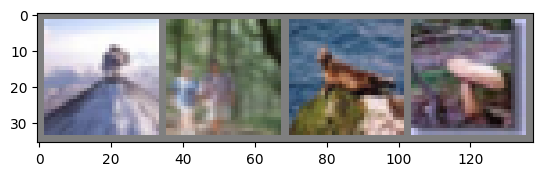

GroundTruth:  mountain forest seal  mushroom


In [78]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [79]:
net = CNN()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [80]:
outputs = net(images)

In [81]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  whale kangaroo tractor lamp 


# Predict the whole dataset

In [82]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [83]:
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 24 %


In [84]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: apple is 58.0 %
Accuracy for class: aquarium_fish is 32.0 %
Accuracy for class: baby  is 29.0 %
Accuracy for class: bear  is 5.0 %
Accuracy for class: beaver is 15.0 %
Accuracy for class: bed   is 14.0 %
Accuracy for class: bee   is 24.0 %
Accuracy for class: beetle is 28.0 %
Accuracy for class: bicycle is 36.0 %
Accuracy for class: bottle is 31.0 %
Accuracy for class: bowl  is 5.0 %
Accuracy for class: boy   is 9.0 %
Accuracy for class: bridge is 38.0 %
Accuracy for class: bus   is 19.0 %
Accuracy for class: butterfly is 22.0 %
Accuracy for class: camel is 10.0 %
Accuracy for class: can   is 24.0 %
Accuracy for class: castle is 52.0 %
Accuracy for class: caterpillar is 5.0 %
Accuracy for class: cattle is 11.0 %
Accuracy for class: chair is 49.0 %
Accuracy for class: chimpanzee is 34.0 %
Accuracy for class: clock is 13.0 %
Accuracy for class: cloud is 48.0 %
Accuracy for class: cockroach is 42.0 %
Accuracy for class: couch is 17.0 %
Accuracy for class: crab  is 10.0

# Confusion matrix

In [85]:
# true_labels = []
# predicted_labels = []
# labels.tolist()
# predictions.tolist()

# confusion = confusion_matrix(true_labels, predicted_labels)
# plt.figure(figsize=(12, 8))
# sns.heatmap(confusion, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

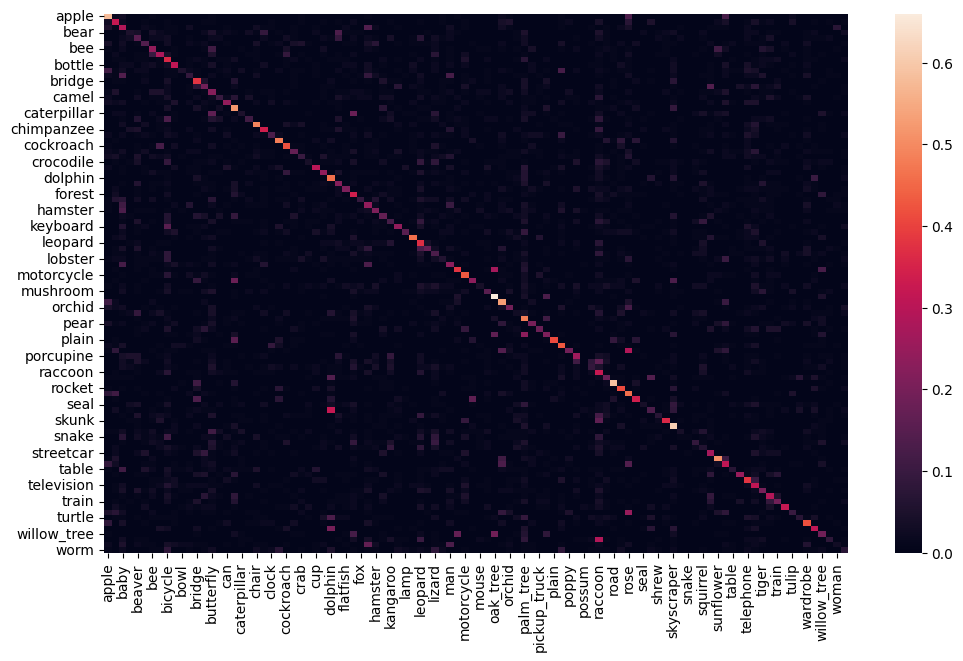

In [86]:
y_pred = []
y_true = []

for inputs, labels in testloader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=False)
plt.savefig('output.png')